In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import math

import time

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso,LassoCV, ElasticNet, ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.feature_selection import RFE

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/master.csv')

In [ ]:
df.shape

(27820, 12)

In [ ]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [ ]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [ ]:
df.rename(columns={" gdp_for_year ($) ":
                  "gdp_for_year", "gdp_per_capita ($)":
                  "gdp_per_capita"}, inplace=True)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
df['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [ ]:
cleanup_nums = {'sex': {'male': 0, 'female': 1}, 'generation': {'Generation X': 1, 'Silent': 0, 'G.I. Generation': 2, 'Boomers': 3, 'Millenials': 4, 'Generation Z': 5}}
df = df.replace(cleanup_nums)

In [ ]:
def means(arr):
    return str(np.array(arr).mean())


df.age.replace(['15-24 years', '25-34 years', '35-54 years', '5-14 years', '55-74 years', '75+ years'], 
                 [means([15, 24]), means([25, 34]), means([35, 54]), 
                  means([5, 14]), means([55, 74]), means([75])], inplace=True)

In [ ]:
df.dtypes

country               object
year                   int64
sex                    int64
age                   object
suicides_no            int64
population             int64
suicides/100k pop    float64
country-year          object
HDI for year         float64
gdp_for_year          object
gdp_per_capita         int64
generation             int64
dtype: object

In [ ]:
df.drop("country-year",axis=1, inplace=True)
df.drop("country",axis=1, inplace=True)

In [ ]:
df['gdp_for_year'] = df['gdp_for_year'].str.replace(",", "").astype("int")

In [ ]:
df.dtypes

year                   int64
sex                    int64
age                   object
suicides_no            int64
population             int64
suicides/100k pop    float64
HDI for year         float64
gdp_for_year           int64
gdp_per_capita         int64
generation             int64
dtype: object

In [ ]:
df = df.dropna(axis=0)

In [ ]:
df.isna().sum()

year                 0
sex                  0
age                  0
suicides_no          0
population           0
suicides/100k pop    0
HDI for year         0
gdp_for_year         0
gdp_per_capita       0
generation           0
dtype: int64

In [ ]:
df.head(10)

,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year,gdp_per_capita,generation
72,1995,0,29.5,13,232900,5.58,0.619,2424499009,835,1
73,1995,0,64.5,9,178000,5.06,0.619,2424499009,835,0
74,1995,1,75.0,2,40800,4.90,0.619,2424499009,835,2
75,1995,1,19.5,13,283500,4.59,0.619,2424499009,835,1
76,1995,0,19.5,11,241200,4.56,0.619,2424499009,835,1
77,1995,0,75.0,1,25100,3.98,0.619,2424499009,835,2
78,1995,0,44.5,14,375900,3.72,0.619,2424499009,835,3
79,1995,1,29.5,7,264000,2.65,0.619,2424499009,835,1
80,1995,1,44.5,8,356400,2.24,0.619,2424499009,835,3
81,1995,0,9.5,6,376500,1.59,0.619,2424499009,835,4


,year,sex,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year,gdp_per_capita,generation
year,1.000000e+00,-7.008043e-16,-0.024297,-0.012628,-0.077410,3.667862e-01,7.910509e-02,2.978880e-01,2.580389e-01
sex,-7.008043e-16,1.000000e+00,-0.158373,0.009092,-0.406362,-2.331707e-17,-2.105455e-16,-1.808962e-16,-3.122478e-17
suicides_no,-2.429726e-02,-1.583726e-01,1.000000,0.698758,0.237169,1.513987e-01,6.072031e-01,1.051824e-01,-8.048915e-02
population,-1.262776e-02,9.091930e-03,0.698758,1.000000,-0.023197,1.029435e-01,7.502960e-01,7.370115e-02,7.867536e-03
suicides/100k pop,-7.741000e-02,-4.063617e-01,0.237169,-0.023197,1.000000,7.427907e-02,2.023085e-02,-2.339023e-03,-2.428400e-01
HDI for year,3.667862e-01,-2.331707e-17,0.151399,0.102943,0.074279,1.000000e+00,3.051935e-01,7.712278e-01,9.466219e-02
gdp_for_year,7.910509e-02,-2.105455e-16,0.607203,0.750296,0.020231,3.051935e-01,1.000000e+00,2.756430e-01,2.309045e-02
gdp_per_capita,2.978880e-01,-1.808962e-16,0.105182,0.073701,-0.002339,7.712278e-01,2.756430e-01,1.000000e+00,8.339947e-02
generation,2.580389e-01,-3.122478e-17,-0.080489,0.007868,-0.242840,9.466219e-02,2.309045e-02,8.339947e-02,1.000000e+00


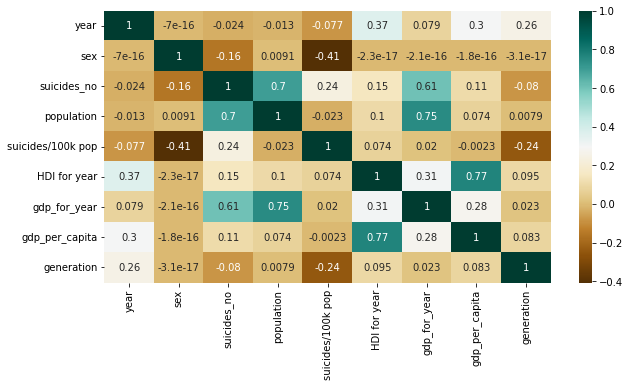

In [ ]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [ ]:
df['fatality_rate'] = np.where(df['suicides/100k pop']>df['suicides/100k pop'].mean(), 1, 0)

In [ ]:
X = df.drop(['suicides/100k pop', 'age'], axis=1)
y = df['suicides/100k pop']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=42)

In [ ]:
#Linear
lin = LinearRegression()
lin.fit(X_train, y_train)
y_pred = lin.predict(X_test)


data = []

MAE_lin_reg = mean_absolute_error(y_test, y_pred)
print("MAE_lin_reg = ", MAE_lin_reg)

MSE_lin_reg = mean_squared_error(y_test, y_pred)
print("MSE_lin_reg = ", MSE_lin_reg)

RMSE_lin_reg = math.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE_lin_reg = ", RMSE_lin_reg)

r2_lin_reg = r2_score(y_test, y_pred)
print("r2_lin_reg = ", r2_lin_reg)

r2adj_lin_reg = 1 - (1-r2_lin_reg) * (len(y)-1) / (len(y) - X.shape[1] - 1)
print("r2adj_lin_reg = ", r2adj_lin_reg)

data.append(
            {
                "Mean Absolute error": MAE_lin_reg,
                "Mean Squared Error": MSE_lin_reg,
                "Root Mean Squared Error ": RMSE_lin_reg,
                "R-squared": r2_lin_reg,
                "Adjusted R-squared": r2adj_lin_reg,
            }
    )

MAE_lin_reg =  6.741977513393607
MSE_lin_reg =  141.47662834358667
RMSE_lin_reg =  11.894394828808512
r2_lin_reg =  0.5522508422241128
r2adj_lin_reg =  0.5517148082749019


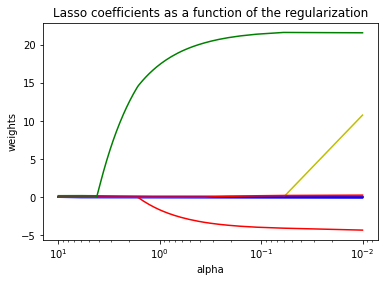

In [ ]:
#Lasso
lasso = Lasso(alpha=0.001)
lasso.fit(X, y)
from cycler import cycler

n_alphas = 200
alphas = np.linspace(0.01, 10, n_alphas)
model = Lasso()

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)

ax = plt.gca()
ax.set_prop_cycle(cycler("color", ["b", "r", "g", "c", "k", "y", "m"]))

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Lasso coefficients as a function of the regularization")
plt.axis("tight")
plt.show();

In [ ]:
lasso_cv = LassoCV(alphas=alphas, cv=3, random_state=17)
lasso_cv.fit(X, y)

las = Lasso(alpha=lasso_cv.alpha_)
las.fit(X_train, y_train)
y_pred = las.predict(X_test)

MAE_las = mean_absolute_error(y_test, y_pred)
print("MAE_las = ", MAE_las)

MSE_las = mean_squared_error(y_test, y_pred)
print("MSE_las = ", MSE_las)

RMSE_las = math.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE_las = ", RMSE_las)

r2_las = r2_score(y_test, y_pred)
print("r2_las = ", r2_las)

r2adj_las = 1 - (1-r2_las) * (len(y)-1) / (len(y) - X.shape[1] - 1)
print("r2_las = ", r2_las)

data.append(
            {
                "Mean Absolute error": MAE_las,
                "Mean Squared Error": MSE_las,
                "Root Mean Squared Error ": RMSE_las,
                "R-squared": r2_las,
                "Adjusted R-squared": r2adj_las,
            }
    )

MAE_las =  6.736408124828199
MSE_las =  141.59611487164668
RMSE_las =  11.899416576943874
r2_las =  0.5518726879456938
r2_las =  0.5518726879456938


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.02161e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.69787e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.47056e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.02221e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-condit

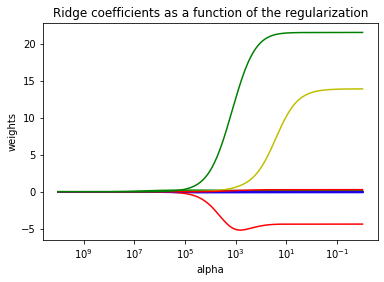

In [ ]:
#Ridge
n_alphas = 200
ridge_alphas = np.logspace(-2, 10, n_alphas)

ridge_cv = RidgeCV(alphas=ridge_alphas, scoring="neg_mean_squared_error", cv=3)
ridge_cv.fit(X, y)

model = Ridge()

coefs = []
for a in ridge_alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)

ax = plt.gca()
ax.set_prop_cycle(cycler("color", ["b", "r", "g", "c", "k", "y", "m"]))

ax.plot(ridge_alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

In [ ]:
rid = Ridge(alpha=ridge_cv.alpha_)
rid.fit(X_train, y_train)
y_pred = rid.predict(X_test)

MAE_rid = mean_absolute_error(y_test, y_pred)
print("MAE_rid = ", MAE_rid)

MSE_rid = mean_squared_error(y_test, y_pred)
print("MSE_rid = ", MSE_rid)

RMSE_rid = math.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE_rid = ", RMSE_rid)

r2_rid = r2_score(y_test, y_pred)
print("r2_rid = ", r2_rid)

r2adj_rid = 1 - (1-r2_rid) * (len(y)-1) / (len(y) - X.shape[1] - 1)
print("r2adj_rid = ", r2adj_rid)

data.append(
            {
                "Mean Absolute error": MAE_rid,
                "Mean Squared Error": MSE_rid,
                "Root Mean Squared Error ": RMSE_rid,
                "R-squared": r2_rid,
                "Adjusted R-squared": r2adj_rid,
            }
    )

MAE_rid =  6.740593616439178
MSE_rid =  141.80955315795293
RMSE_rid =  11.908381634712288
r2_rid =  0.5511971925366665
r2adj_rid =  0.5506598971847412


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.84092e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [ ]:
#Tree
dt  = DecisionTreeRegressor(max_depth = 10)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

MAE_dt = mean_absolute_error(y_test, y_pred)
print("MAE_dt = ", MAE_dt)

MSE_dt = mean_squared_error(y_test, y_pred)
print("MSE_dt = ", MSE_dt)

RMSE_dt = math.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE_dt = ", RMSE_dt)

r2_dt = r2_score(y_test, y_pred)
print("r2_dt = ", r2_dt)

r2adj_dt = 1 - (1-r2_dt) * (len(y)-1) / (len(y) - X.shape[1] - 1)
print("r2adj_dt = ", r2adj_dt)

data.append(
            {
                "Mean Absolute error": MAE_dt,
                "Mean Squared Error": MSE_dt,
                "Root Mean Squared Error ": RMSE_dt,
                "R-squared": r2_dt,
                "Adjusted R-squared": r2adj_dt,
            }
    )

MAE_dt =  2.2525091142489155
MSE_dt =  31.468176927658284
RMSE_dt =  5.609650339161816
r2_dt =  0.9004086407693903
r2adj_dt =  0.9002894125169892


In [ ]:
#XGB

xgb = XGBRegressor(max_depth = 10, n_estimators=370)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

MAE_xgb = mean_absolute_error(y_test, y_pred)
print("MAE_xgb = ", MAE_xgb)

MSE_xgb = mean_squared_error(y_test, y_pred)
print("MSE_xgb = ", MSE_xgb)

RMSE_xgb = math.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE_xgb = ", RMSE_xgb)

r2_xgb = r2_score(y_test, y_pred)
print("r2_xgb = ", r2_xgb)

r2adj_xgb = 1 - (1-r2_xgb) * (len(y)-1) / (len(y) - X.shape[1] - 1)
print("r2adj_xgb = ", r2adj_xgb)

data.append(
            {
                "Mean Absolute error": MAE_xgb,
                "Mean Squared Error": MSE_xgb,
                "Root Mean Squared Error ": RMSE_xgb,
                "R-squared": r2_xgb,
                "Adjusted R-squared": r2adj_xgb,
            }
    )

[04:16:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE_xgb =  0.7369424884775245
MSE_xgb =  9.099581821724106
RMSE_xgb =  3.01655131262906
r2_xgb =  0.9712013910389854
r2adj_xgb =  0.9711703654846822


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10535.303137938376, tolerance: 211.8946109887074
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 311754.71872180136, tolerance: 211.8946109887074
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 359420.2524393349, tolerance: 211.8946109887074
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarni

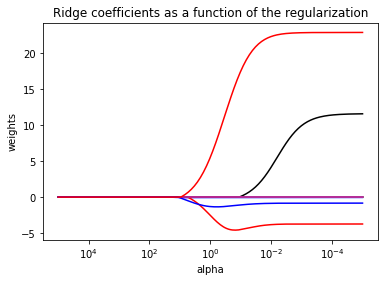

In [ ]:
#ElasticNet

n_alphas = 200
EN_alphas = np.logspace(-5, 5, n_alphas)

EN_cv = ElasticNetCV(alphas=EN_alphas, cv=5)
EN_cv.fit(X, y)

model = ElasticNet()

coefs = []
for a in EN_alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)

ax = plt.gca()
ax.set_prop_cycle(cycler("color", ["b", "r", "g", "c", "k", "y", "m"]))

ax.plot(EN_alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

In [ ]:
EN = ElasticNet(alpha=EN_cv.alpha_)
EN.fit(X_train, y_train)
y_pred = EN.predict(X_test)

In [ ]:
MAE_EN = mean_absolute_error(y_test, y_pred)
print("MAE_EN = ", MAE_EN)

MSE_EN = mean_squared_error(y_test, y_pred)
print("MSE_EN = ", MSE_EN)

RMSE_EN = math.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE_EN = ", RMSE_EN)

r2_EN = r2_score(y_test, y_pred)
print("r2_EN = ", r2_EN)

r2adj_EN = 1 - (1-r2_EN) * (len(y)-1) / (len(y) - X.shape[1] - 1)
print("r2adj_EN = ", r2adj_EN)

data.append(
            {
                "Mean Absolute error": MAE_EN,
                "Mean Squared Error": MSE_EN,
                "Root Mean Squared Error ": RMSE_EN,
                "R-squared": r2_EN,
                "Adjusted R-squared": r2adj_EN,
            }
    )

MAE_EN =  6.745597566509238
MSE_EN =  146.44298924532467
RMSE_EN =  12.101363115175277
r2_EN =  0.5365331654813232
r2adj_EN =  0.5360338595786815


In [ ]:
results = pd.DataFrame(
    data=data,
    columns=["Mean Absolute error", "Mean Squared Error", "Root Mean Squared Error ", "R-squared", "Adjusted R-squared"],
    index=["Линейная регрессия", "Дерево решений", "XGBRegressor", "Lasso", "Ridge", "Elastic Net"], # 
)

results

,Mean Absolute error,Mean Squared Error,Root Mean Squared Error,R-squared,Adjusted R-squared
Линейная регрессия,6.741978,141.476628,11.894395,0.552251,0.551715
Дерево решений,6.736408,141.596115,11.899417,0.551873,0.551336
XGBRegressor,6.740594,141.809553,11.908382,0.551197,0.550660
Lasso,2.252509,31.468177,5.609650,0.900409,0.900289
Ridge,0.736942,9.099582,3.016551,0.971201,0.971170
Elastic Net,6.745598,146.442989,12.101363,0.536533,0.536034
